### Jane Street Market Prediction

Jane Street Prediction은 전문 주식 및 금융 상품 투자 회사로 투자를 개선시키기 위해서 이번 공모전을 진행

#### 1. 평가 방법
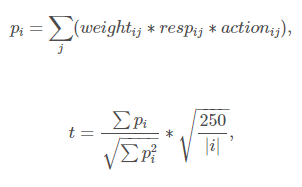

트레이딩 기회가 유효한 건인지 아닌지 판단해서
유효한 건이면 1를 산출, 아니면 0을 산출해서 결과값을 전송

#### 2. 기간
~ 2021년 15일까지 진행

#### 3. 데이터 구성
- train.csv: 학습 데이터
- example_test.csv: 숨김 테스트 파일 셋
- example_sample_submission: 제출 파일
- features.csv: 데이터 컬럼들의 속성을 담고 있는 메타데이터

### 1. 패키지 및 데이터 불러오기

In [1]:
## 패키지 호출

import pandas as pd
import numpy as np
#from pandas_profiling import ProfileReport

In [2]:
## 데이터 경로 설정
path= "C:/Users/User/Desktop/kaggle_competition/src/"

## 데이터 호출
train_dt= pd.read_csv(path+"train.csv")
feature_dt= pd.read_csv(path+"features.csv")
test_dt= pd.read_csv(path+"example_test.csv")
submission_dt= pd.read_csv(path+"example_sample_submission.csv")

### 2. EDA

In [3]:
train_dt.head()

,date,weight,resp_1,resp_2,resp_3,resp_4,resp,feature_0,feature_1,feature_2,...,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,ts_id
0,0,0.000000,0.009916,0.014079,0.008773,0.001390,0.006270,1,-1.872746,-2.191242,...,NaN,1.168391,8.313583,1.782433,14.018213,2.653056,12.600292,2.301488,11.445807,0
1,0,16.673515,-0.002828,-0.003226,-0.007319,-0.011114,-0.009792,-1,-1.349537,-1.704709,...,NaN,-1.178850,1.777472,-0.915458,2.831612,-1.417010,2.297459,-1.304614,1.898684,1
2,0,0.000000,0.025134,0.027607,0.033406,0.034380,0.023970,-1,0.812780,-0.256156,...,NaN,6.115747,9.667908,5.542871,11.671595,7.281757,10.060014,6.638248,9.427299,2
3,0,0.000000,-0.004730,-0.003273,-0.000461,-0.000476,-0.003200,-1,1.174378,0.344640,...,NaN,2.838853,0.499251,3.033732,1.513488,4.397532,1.266037,3.856384,1.013469,3
4,0,0.138531,0.001252,0.002165,-0.001215,-0.006219,-0.002604,1,-3.172026,-3.093182,...,NaN,0.344850,4.101145,0.614252,6.623456,0.800129,5.233243,0.362636,3.926633,4


In [4]:
train_dt.describe()

,date,weight,resp_1,resp_2,resp_3,resp_4,resp,feature_0,feature_1,feature_2,...,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,ts_id
count,2.390491e+06,2.390491e+06,2.390491e+06,2.390491e+06,2.390491e+06,2.390491e+06,2.390491e+06,2.390491e+06,2.390491e+06,2.390491e+06,...,2.320637e+06,2.390268e+06,2.390268e+06,2.374408e+06,2.374408e+06,2.381638e+06,2.381638e+06,2.388570e+06,2.388570e+06,2.390491e+06
mean,2.478668e+02,3.031535e+00,1.434969e-04,1.980749e-04,2.824183e-04,4.350201e-04,4.083113e-04,9.838565e-03,3.855776e-01,3.576875e-01,...,2.687757e-01,3.435523e-01,2.799973e-01,3.351537e-01,2.448752e-01,3.391778e-01,2.323809e-01,3.425608e-01,2.456182e-01,1.195245e+06
std,1.522746e+02,7.672794e+00,8.930163e-03,1.230236e-02,1.906882e-02,3.291224e-02,2.693609e-02,9.999518e-01,2.559373e+00,2.477335e+00,...,2.174238e+00,2.087842e+00,1.977643e+00,1.742587e+00,2.242853e+00,2.534498e+00,1.795854e+00,2.307130e+00,1.765419e+00,6.900755e+05
min,0.000000e+00,0.000000e+00,-3.675043e-01,-5.328334e-01,-5.681196e-01,-5.987447e-01,-5.493845e-01,-1.000000e+00,-3.172026e+00,-3.093182e+00,...,-7.471971e+00,-5.862979e+00,-6.029281e+00,-4.080720e+00,-8.136407e+00,-8.215050e+00,-5.765982e+00,-7.024909e+00,-5.282181e+00,0.000000e+00
25%,1.040000e+02,1.617400e-01,-1.859162e-03,-2.655044e-03,-5.030704e-03,-9.310415e-03,-7.157903e-03,-1.000000e+00,-1.299334e+00,-1.263628e+00,...,-1.123252e+00,-1.114326e+00,-9.512009e-01,-9.133750e-01,-1.212124e+00,-1.452912e+00,-8.993050e-01,-1.278341e+00,-8.544535e-01,5.976225e+05
50%,2.540000e+02,7.086770e-01,4.552665e-05,6.928179e-05,1.164734e-04,1.222579e-04,8.634997e-05,1.000000e+00,-1.870182e-05,-7.200577e-07,...,0.000000e+00,7.006233e-17,6.054629e-17,4.870826e-17,-2.558675e-16,1.015055e-16,5.419920e-17,8.563069e-17,4.869529e-17,1.195245e+06
75%,3.820000e+02,2.471791e+00,2.097469e-03,2.939111e-03,5.466336e-03,9.804649e-03,7.544347e-03,1.000000e+00,1.578417e+00,1.526399e+00,...,1.342829e+00,1.405926e+00,1.308625e+00,1.228277e+00,1.409687e+00,1.767275e+00,1.111491e+00,1.582633e+00,1.125321e+00,1.792868e+06
max,4.990000e+02,1.672937e+02,2.453477e-01,2.949339e-01,3.265597e-01,5.113795e-01,4.484616e-01,1.000000e+00,7.442989e+01,1.480763e+02,...,1.107771e+02,4.812516e+01,1.276908e+02,6.514517e+01,7.052807e+01,5.872849e+01,6.932221e+01,5.119038e+01,1.164568e+02,2.390490e+06


### 데이터 컬럼 정리

- feature 0~129: 주식 데이터 항목들 (정보 보호로 인해 데이터 속성은 표기 안함)
- resp, weight: 거래로 인해 발생하는 return을 나타내는 정보
- ts_id: 타임 정보
- action: 타겟 밸류로 1은 거래가 된 것, 0은 거래 실패로 분류

In [5]:
train_dt.columns

Index(['date', 'weight', 'resp_1', 'resp_2', 'resp_3', 'resp_4', 'resp',
       'feature_0', 'feature_1', 'feature_2',
       ...
       'feature_121', 'feature_122', 'feature_123', 'feature_124',
       'feature_125', 'feature_126', 'feature_127', 'feature_128',
       'feature_129', 'ts_id'],
      dtype='object', length=138)